# Lab03_523H0164

# Exercises

## Import libraries and useful function

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(image, title="Image", student_id="523H0164"):
    img_to_show = image.copy()

    # auto adjust fontscale
    font_scale = max(image.shape[1] / 500, 0.5)
    thickness = max(int(font_scale * 2), 2)
    margin = int(image.shape[1] * 0.015)
    position = (margin, image.shape[0] - margin)
    font = cv2.FONT_HERSHEY_SIMPLEX
    roi_y_start = image.shape[0] - int(image.shape[0] * 0.1)
    roi_x_end = int(image.shape[1] * 0.25)
    corner_roi = image[roi_y_start:, :roi_x_end]

    # auto adjust the color
    if len(corner_roi.shape) == 3 and corner_roi.shape[2] == 3:
        gray_roi = cv2.cvtColor(corner_roi, cv2.COLOR_BGR2GRAY)
        mean_intensity = np.mean(gray_roi)
    else:
        mean_intensity = np.mean(corner_roi)

    text_color_bgr = (0, 0, 0) if mean_intensity > 127 else (255, 255, 255)

    # put text
    cv2.putText(img_to_show, student_id, position, font, font_scale, text_color_bgr, thickness)

    if len(img_to_show.shape) == 3 and img_to_show.shape[2] == 3:
        img_to_display = cv2.cvtColor(img_to_show, cv2.COLOR_BGR2RGB)
        plt.imshow(img_to_display)
    else:
        plt.imshow(img_to_show, cmap='gray')

    plt.title(title)
    plt.axis('off')
    plt.show()

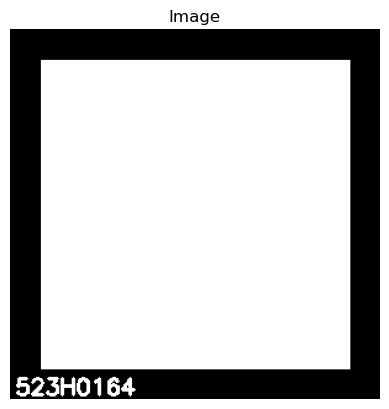

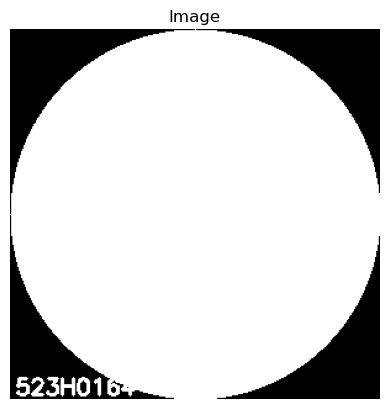

In [55]:
# creating a rectangle
rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
display_image(rectangle)

# creating a circle
circle = np.zeros((300, 300), dtype="uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
display_image(circle)

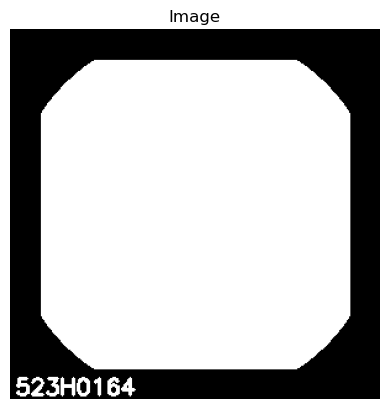

In [56]:
test_bitwiseAnd = cv2.bitwise_and(rectangle,circle)
display_image(test_bitwiseAnd)

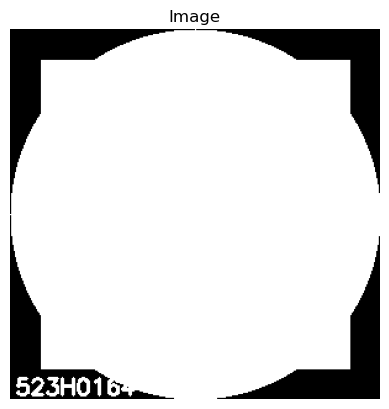

In [57]:
test_bitwiseOr = cv2.bitwise_or(rectangle,circle)
display_image(test_bitwiseOr)

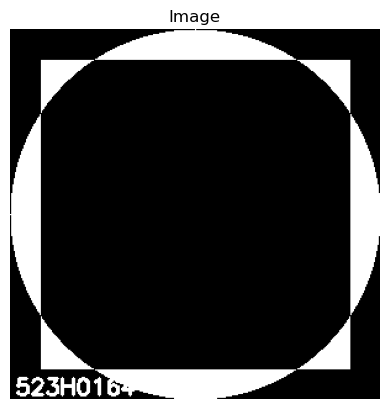

In [58]:
# only care with the differences
test_bitwiseXor = cv2.bitwise_xor(rectangle,circle)
display_image(test_bitwiseXor)

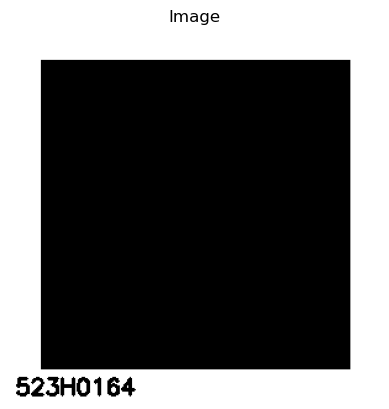

In [59]:
test_bitwiseNot = cv2.bitwise_not(rectangle, circle)

display_image(test_bitwiseNot)

### Exercise 1:
Masking image

Extracting the faces from the input image using a circular mask.

Output is 3 of face images extracted from the input image.

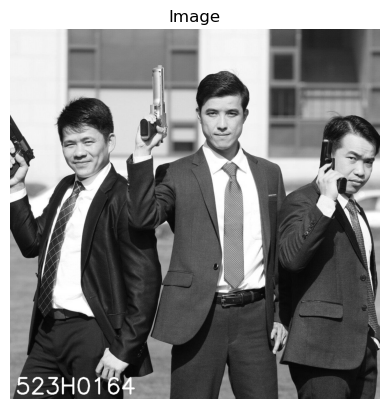

In [60]:
img = cv2.imread('exercise_1.png')
display_image(img)

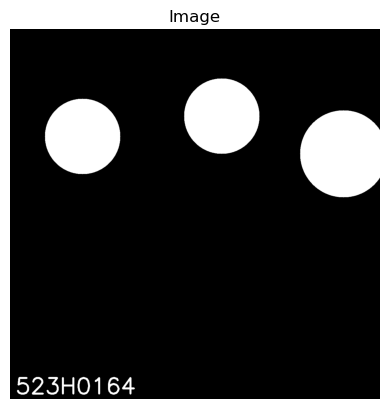

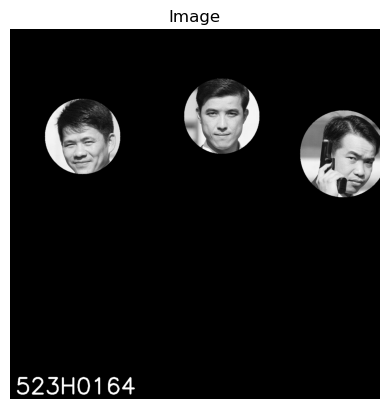

In [61]:
mask = np.zeros(img.shape[:2], dtype='uint8')

w, h, _ = img.shape

mask = cv2.circle(mask, (250, 370), 130, 255,-1)
mask = cv2.circle(mask, (730, 300), 130, 255,-1)
mask = cv2.circle(mask, (1150, 430), 150, 255,-1)
display_image(mask)

masked = cv2.bitwise_and(img, img ,mask=mask)

display_image(masked)


### Exercise 2:
Blend the following 2 images to create a new image


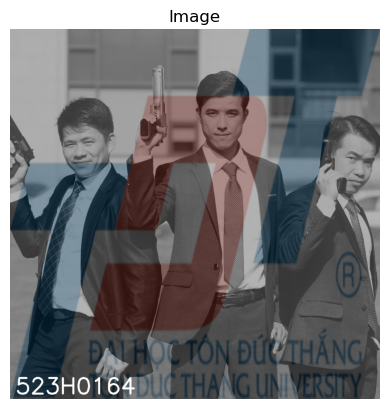

In [62]:
img_tdtu = cv2.imread("exercise2.png")

# resize the image
img_tdtu = cv2.resize(img_tdtu, img.shape[1::-1])

dst = cv2.addWeighted(img, 0.5, img_tdtu, 0.2, 0)
display_image(dst)

### Exercise 3:
Image thresholding

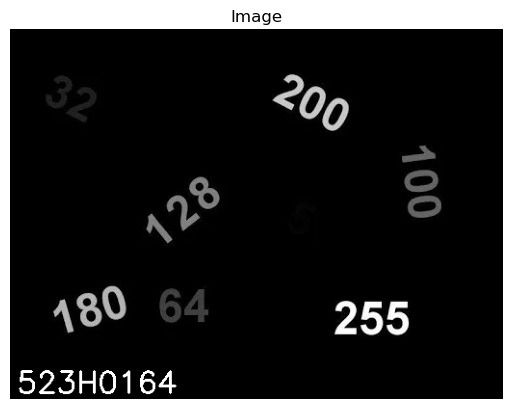

In [63]:
img_ex3 = cv2.imread("exercise3.png")
display_image(img_ex3)

#### Exercise 3.1:

a)

Convert the image into 02 binary images:
- 1st output :  numbers greater than or equals to 180 are in black

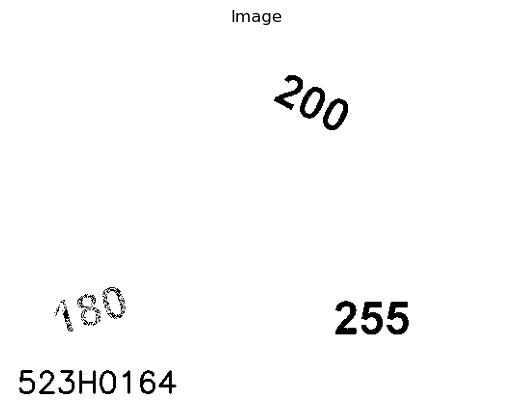

In [64]:
th, dst = cv2.threshold(img_ex3, 179, 255, cv2.THRESH_BINARY_INV)

display_image(dst)

#### Exercise 3.1:

b)

- 2nd output:  numbers less than 180 are in white

[  0 255]


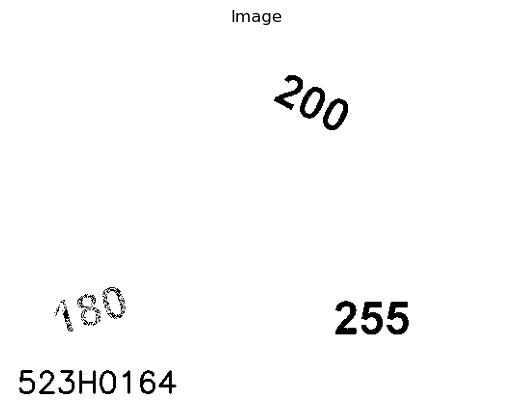

In [ ]:
img_cvt = cv2.cvtColor(img_ex3, cv2.COLOR_BGR2GRAY)
img_array = np.asarray(img_cvt)

w, h = img_array.shape

for i in range(w):
    for j in range(h):
        if img_array[i, j] < 180:
            img_array[i, j] = 255
        else:
            img_array[i, j] = 0

display_image(img_array)


#### Exercise 3.2:

Extract each number in the input image as in separated images.

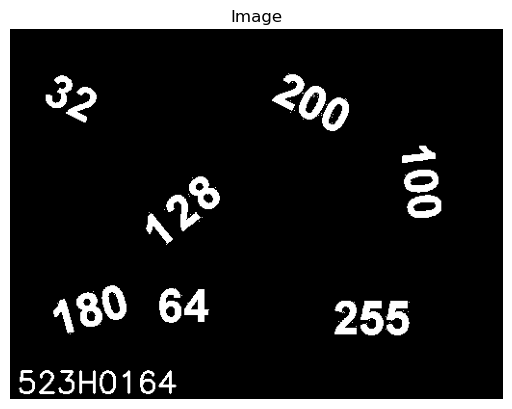

In [66]:

img_ex3 = cv2.cvtColor(img_ex3, cv2.COLOR_BGR2GRAY)
th, dst = cv2.threshold(img_ex3, 15, 255, cv2.THRESH_BINARY)
display_image(dst)

#### Homework
Create a video from your webcam by inserting the TDT logo to images streaming from your webcam.

- I take the video first and store it to a .mp4 file and then read it and add the logo

Processing frame 100/124


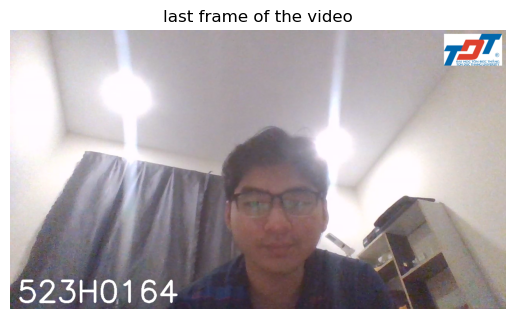

In [67]:
INPUT_VIDEO_PATH = 'input_video.mp4'
LOGO_IMAGE_PATH = 'exercise2.png'
OUTPUT_VIDEO_PATH = 'output_video.mp4'

cap = cv2.VideoCapture(INPUT_VIDEO_PATH)

if not cap.isOpened():
    print(f"Error: Could not open video file at {INPUT_VIDEO_PATH}")
else:
    logo = cv2.imread(LOGO_IMAGE_PATH, -1)

    logo_height, logo_width, _ = logo.shape
    new_logo_width = 150
    aspect_ratio = new_logo_width / logo_width
    new_logo_height = int(logo_height * aspect_ratio)
    logo = cv2.resize(logo, (new_logo_width, new_logo_height))
    logo_h, logo_w, _ = logo.shape

    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(OUTPUT_VIDEO_PATH, fourcc, fps, (frame_width, frame_height))

    frame_count = 0
    last_frame_with_logo = None

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        frame_count += 1
        if frame_count % 100 == 0:
             print(f"Processing frame {frame_count}/{total_frames}")


        margin = 10
        y_offset = margin
        x_offset = frame_width - logo_w - margin
        if (y_offset + logo_h <= frame_height) and (x_offset + logo_w <= frame_width):
            roi = frame[y_offset:y_offset+logo_h, x_offset:x_offset+logo_w]

            alpha_mask = logo[:, :, 3] / 255.0
            inverse_alpha_mask = 1.0 - alpha_mask

            for c in range(0, 3):
                roi[:, :, c] = (inverse_alpha_mask * roi[:, :, c]) + (alpha_mask * logo[:, :, c])
            
            frame[y_offset:y_offset+logo_h, x_offset:x_offset+logo_w] = roi
        
        out.write(frame)
        
        last_frame_with_logo = frame.copy()


    cap.release()
    out.release()
    cv2.destroyAllWindows()


    display_image(last_frame_with_logo, "last frame of the video")
